## Heat Map

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
import seaborn as sns

In [5]:
oo = pd.read_csv('olympics.csv', skiprows=4)

In [6]:
oo.head()

,City,Edition,Sport,Discipline,Athlete,NOC,Gender,Event,Event_gender,Medal
0,Athens,1896,Aquatics,Swimming,"HAJOS, Alfred",HUN,Men,100m freestyle,M,Gold
1,Athens,1896,Aquatics,Swimming,"HERSCHMANN, Otto",AUT,Men,100m freestyle,M,Silver
2,Athens,1896,Aquatics,Swimming,"DRIVAS, Dimitrios",GRE,Men,100m freestyle for sailors,M,Bronze
3,Athens,1896,Aquatics,Swimming,"MALOKINIS, Ioannis",GRE,Men,100m freestyle for sailors,M,Gold
4,Athens,1896,Aquatics,Swimming,"CHASAPIS, Spiridon",GRE,Men,100m freestyle for sailors,M,Silver


### Total medals won by participating countries in 2008

In [7]:
oo.groupby(['NOC', 'Medal']).size()

NOC  Medal 
AFG  Bronze     1
AHO  Silver     1
ALG  Bronze     8
     Gold       4
     Silver     2
               ..
ZIM  Gold      18
     Silver     4
ZZX  Bronze    10
     Gold      23
     Silver    15
Length: 334, dtype: int64

In [9]:
g = oo.groupby(['NOC', 'Medal']).size().unstack('Medal', fill_value=0)
g

Medal,Bronze,Gold,Silver
NOC,,,
AFG,1,0,0
AHO,0,0,1
ALG,8,4,2
ANZ,5,20,4
ARG,88,68,83
...,...,...,...
VIE,0,0,2
YUG,118,143,174
ZAM,1,0,1


In [13]:
new = g.sort_values(['Gold', 'Silver', 'Bronze'], ascending=False)[['Gold', 'Silver', 'Bronze']]
new

Medal,Gold,Silver,Bronze
NOC,,,
USA,2088,1195,1052
URS,838,627,584
GBR,498,591,505
ITA,460,394,374
GER,407,350,454
...,...,...,...
KUW,0,0,1
MKD,0,0,1
MRI,0,0,1


<AxesSubplot:xlabel='Medal', ylabel='NOC'>

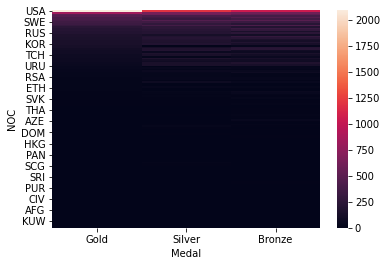

In [14]:
sns.heatmap(new)

In [16]:
final = new.transpose()
final

NOC,USA,URS,GBR,ITA,GER,HUN,FRA,SWE,GDR,AUS,...,BER,DJI,ERI,GUY,IRQ,KUW,MKD,MRI,NIG,TOG
Medal,,,,,,,,,,,,,,,,,,,,,
Gold,2088,838,498,460,407,400,378,347,329,293,...,0,0,0,0,0,0,0,0,0,0
Silver,1195,627,591,394,350,308,461,349,271,369,...,0,0,0,0,0,0,0,0,0,0
Bronze,1052,584,505,374,454,345,475,325,225,413,...,1,1,1,1,1,1,1,1,1,1


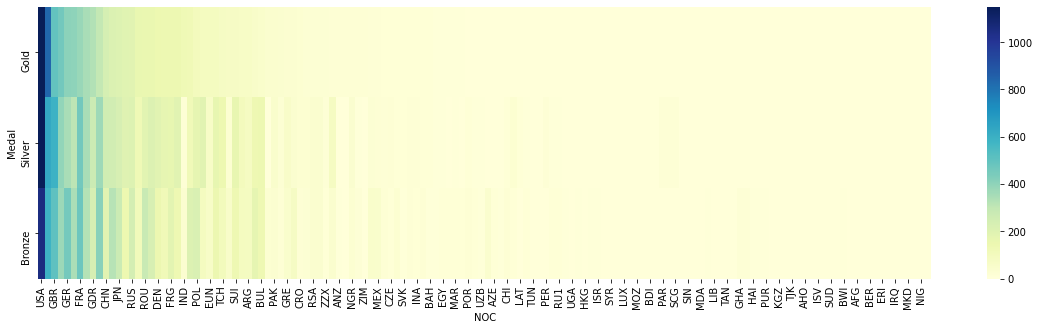

In [43]:
plt.figure(figsize=(20,5))
sns.heatmap(final,  vmin=0, vmax=1150,cmap="YlGnBu" );

## Color Map

<AxesSubplot:xlabel='Athlete'>

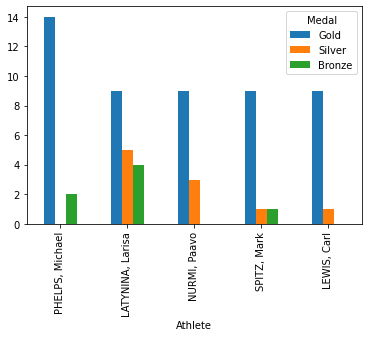

In [55]:
g = oo.groupby(['Athlete','Medal']).size().unstack('Medal', fill_value=0)
g.sort_values(['Gold', 'Silver', 'Bronze'], ascending=False)[['Gold', 'Silver','Bronze']].head().plot(kind='bar')

In [56]:
from matplotlib.colors import ListedColormap

In [57]:
sns.color_palette()

[(0.12156862745098039, 0.4666666666666667, 0.7058823529411765),
 (1.0, 0.4980392156862745, 0.054901960784313725),
 (0.17254901960784313, 0.6274509803921569, 0.17254901960784313),
 (0.8392156862745098, 0.15294117647058825, 0.1568627450980392),
 (0.5803921568627451, 0.403921568627451, 0.7411764705882353),
 (0.5490196078431373, 0.33725490196078434, 0.29411764705882354),
 (0.8901960784313725, 0.4666666666666667, 0.7607843137254902),
 (0.4980392156862745, 0.4980392156862745, 0.4980392156862745),
 (0.7372549019607844, 0.7411764705882353, 0.13333333333333333),
 (0.09019607843137255, 0.7450980392156863, 0.8117647058823529)]

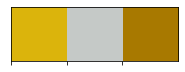

In [58]:
gsb = ['#dbb40c', '#c5c9c7','#a87900']
sns.palplot(sns.color_palette(gsb))

In [62]:
my_gsb = ListedColormap(sns.color_palette(gsb))

<AxesSubplot:xlabel='Athlete'>

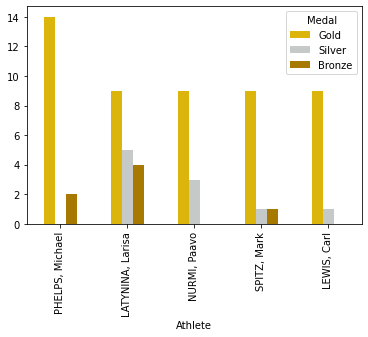

In [64]:
g = oo.groupby(['Athlete','Medal']).size().unstack('Medal', fill_value=0)
g = g.sort_values(['Gold', 'Silver', 'Bronze'], ascending=False)[['Gold', 'Silver','Bronze']].head()
g.plot(kind='bar', colormap=my_gsb)